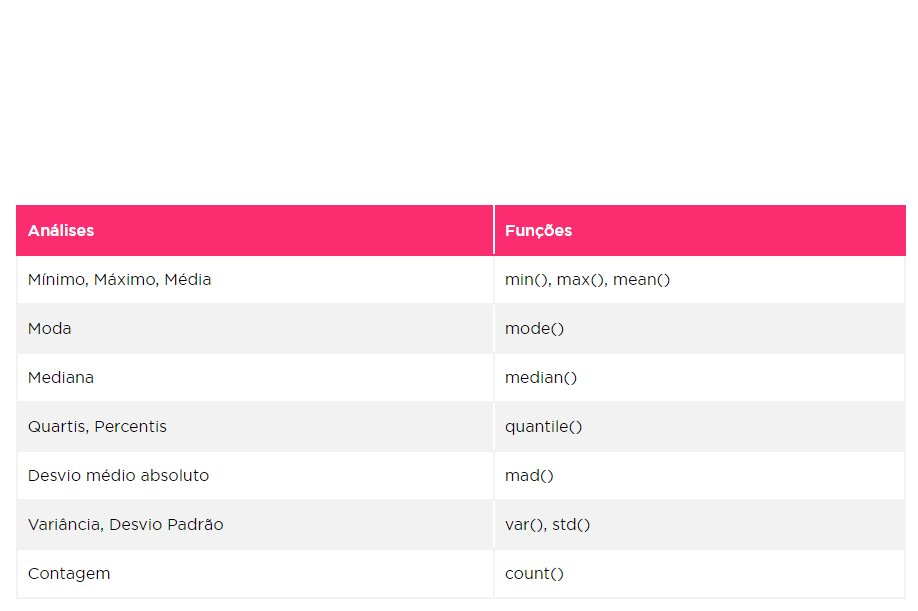

### Modulos

In [1]:
# bibliotecas

import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('Atividade cap 11 dados_1997_2011_paises_csv.csv',
                 sep = ';',
                 decimal = ',',
                 encoding = 'latin1')

df.head()

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao
0,África do Sul,1997,0.6328,56,44.54,52.60298,148814151.0,43353.632
1,África do Sul,1998,0.6272,57,31.11,54.51911,134295557.0,43961.924
2,África do Sul,1999,0.6216,50,43.90,61.04379,133183581.0,44526.272
3,África do Sul,2000,0.6160,52,51.52,62.47182,132877648.0,45064.098
4,África do Sul,2001,0.6126,50,45.12,62.04144,118478979.0,45576.215


### Tipos de dados

In [5]:
df.dtypes

pais                       object
ano                         int64
idh                       float64
corrupcao_indice            int64
competitividade_indice    float64
globalizacao_indice       float64
pib                       float64
populacao                 float64
dtype: object

### Contagem dos paises

In [7]:
#agrupado por pais e filtrando a coluna idh

df.groupby('pais').agg(n = pd.NamedAgg('pais', 'count')).reset_index()

,pais,n
0,Alemanha,15
1,Austrália,15
2,Brasil,15
3,Bélgica,15
4,Canadá,15
5,China,15
6,Cingapura,15
7,Coréia,15
8,Espanha,15
9,Estados Unidos,15


### Medidas Descritivas

In [8]:
df.groupby('pais').agg(min = pd.NamedAgg('idh', 'min'),
                       max = pd.NamedAgg('idh', 'max'),
                       media = pd.NamedAgg('idh', 'mean')).reset_index()

,pais,min,max,media
0,Alemanha,0.8466,0.9050,0.882880
1,Austrália,0.8958,0.9290,0.914507
2,Brasil,0.6464,0.7180,0.684653
3,Bélgica,0.8628,0.8860,0.876107
4,Canadá,0.8736,0.9080,0.890480
5,China,0.5598,0.6870,0.625240
6,Cingapura,0.7404,0.8660,0.821587
7,Coréia,0.8078,0.8970,0.856907
8,Espanha,0.8162,0.8780,0.852427
9,Estados Unidos,0.8886,0.9130,0.900947


Moda

In [10]:
df.groupby('pais')['idh'].apply(lambda x: x.mode().iloc[0]).to_frame().reset_index()

,pais,idh
0,Alemanha,0.8466
1,Austrália,0.8958
2,Brasil,0.6464
3,Bélgica,0.8628
4,Canadá,0.9030
5,China,0.5598
6,Cingapura,0.7404
7,Coréia,0.8078
8,Espanha,0.8162
9,Estados Unidos,0.8886


Mediana

In [12]:
df.groupby('pais').agg(media = pd.NamedAgg('idh', 'mean')).reset_index()

,pais,media
0,Alemanha,0.882880
1,Austrália,0.914507
2,Brasil,0.684653
3,Bélgica,0.876107
4,Canadá,0.890480
5,China,0.625240
6,Cingapura,0.821587
7,Coréia,0.856907
8,Espanha,0.852427
9,Estados Unidos,0.900947


Percentis

In [13]:
dados = [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
np.quantile(dados, 0.35)

3.8

In [20]:
percentis = df.groupby('pais')['idh']                .apply(lambda x: x.quantile([0.05, 0.25, 0.5, 0.75, 0.95]))                .to_frame()                .reset_index()                .rename(columns={'level_1': 'percentil'})

percentis

,pais,percentil,idh
0,Alemanha,0.05,0.85066
1,Alemanha,0.25,0.86710
2,Alemanha,0.50,0.88880
3,Alemanha,0.75,0.90050
4,Alemanha,0.95,0.90360
...,...,...,...
90,Índia,0.05,0.44996
91,Índia,0.25,0.46530
92,Índia,0.50,0.49540
93,Índia,0.75,0.52500


### Ajuste adicionais

In [23]:
percentis.pivot(index = 'pais', columns = 'percentil', values = 'idh').reset_index().rename(columns={0.05: 'p_5', 0.95: 'p_95'})

percentil,pais,p_5,0.25,0.5,0.75,p_95
0,Alemanha,0.85066,0.8671,0.8888,0.9005,0.90360
1,Austrália,0.89818,0.9072,0.9156,0.9230,0.92760
2,Brasil,0.65074,0.6677,0.6866,0.7025,0.71590
3,Bélgica,0.86588,0.8733,0.8754,0.8810,0.88530
4,Canadá,0.87486,0.8803,0.8894,0.9015,0.90730
5,China,0.56638,0.5925,0.6240,0.6605,0.68350
6,Cingapura,0.75454,0.8044,0.8282,0.8525,0.86460
7,Coréia,0.81298,0.8336,0.8588,0.8835,0.89490
8,Espanha,0.82152,0.8408,0.8534,0.8685,0.87660
9,Estados Unidos,0.89056,0.8975,0.9010,0.9055,0.90950


Desvio medio absoluto, padrão